## Importing Python libraries

In [4]:
import numpy as np
import pandas as pd

#visualisations library
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE

## Loading data

In [6]:
df_app=pd.read_csv("application_record.csv", encoding='utf-8')
df_credit=pd.read_csv("credit_record.csv", encoding ='utf-8')
df=df_app.merge(df_credit, how='inner', on='ID')

In [7]:
df.shape

(777715, 20)

## Data Processing

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [12]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [13]:
# Creating new column by dividing the birthday_count with 365, by which we get age in years

df['Age_in_years'] = np.abs((df['DAYS_BIRTH'])/365)

In [28]:
# Crearting new column which gives experience in years by dividing employed_days with 365
df['experience in years'] = np.where(df['DAYS_EMPLOYED'] < 0, np.abs(df['DAYS_EMPLOYED']) / 365, 0)

In [30]:
# Missing values in occupation type
a=df.OCCUPATION_TYPE.isnull().sum()/df.OCCUPATION_TYPE.count()
print(a)

0.4464622154604988


In [32]:
#Almost 44% data missing. Not a good option to impute with mode values. Creating another categorical value named as "Unknown"

In [34]:
df.OCCUPATION_TYPE.isnull().sum()

240048

In [36]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna("Unknown")

In [38]:
df.OCCUPATION_TYPE.isnull().sum()

0

## Exploratory Data Analysis

In [41]:
sns.set_style(style='dark')

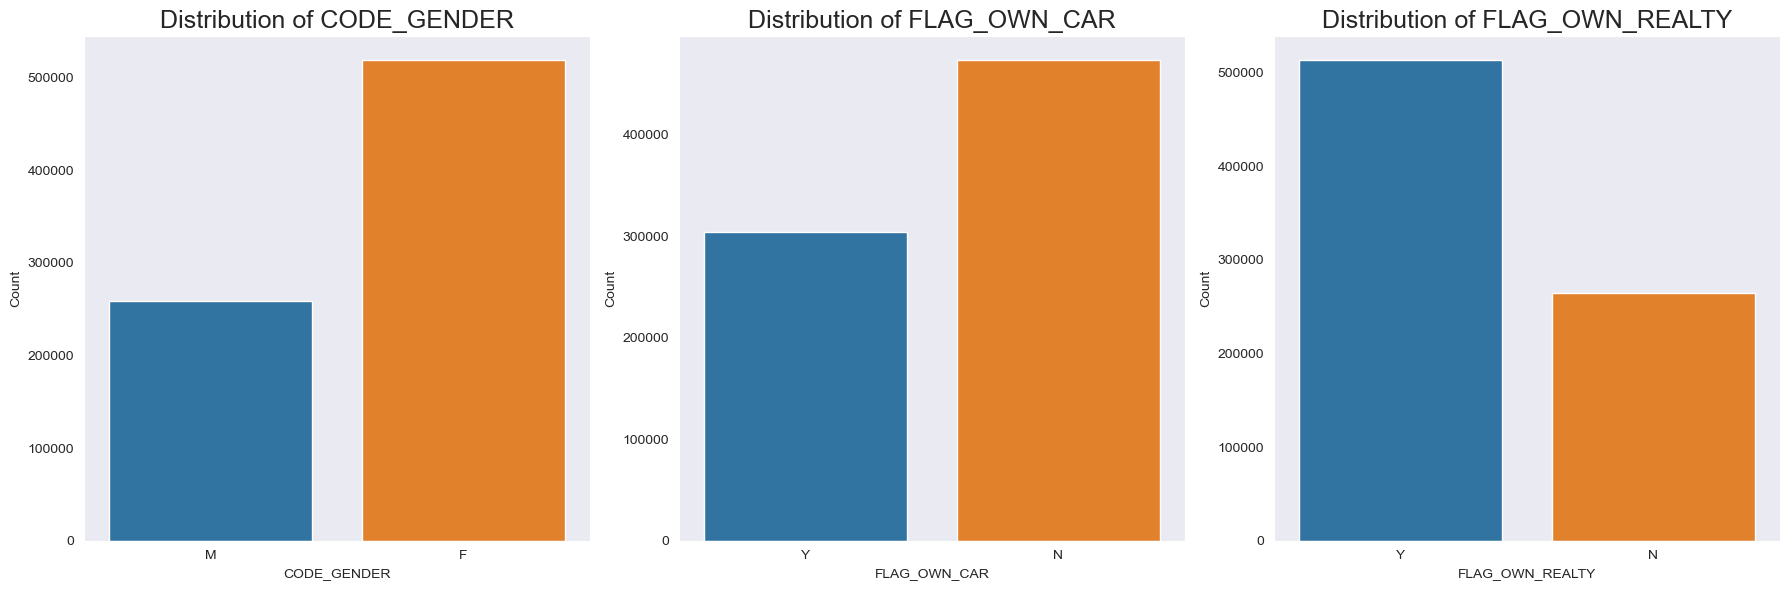

In [44]:
cols=['CODE_GENDER', 	'FLAG_OWN_CAR', 	'FLAG_OWN_REALTY']

fig, axes=plt.subplots(nrows=1,ncols=3, figsize=(18,6))

for index,value in enumerate(cols):
    sns.countplot(data =df, x=value, ax=axes[index])
    axes[index].set_title(f'Distribution of {value}', fontsize=18)
    axes[index].set_ylabel('Count')
    axes[index].grid=True

plt.tight_layout()
plt.show()

In [45]:
# The dataset represent higher share of females. ie) higher number of females are applying for credit cards.
# A notable majority of the applicants dont own a car.
# A significantly high number of applicants owns property.

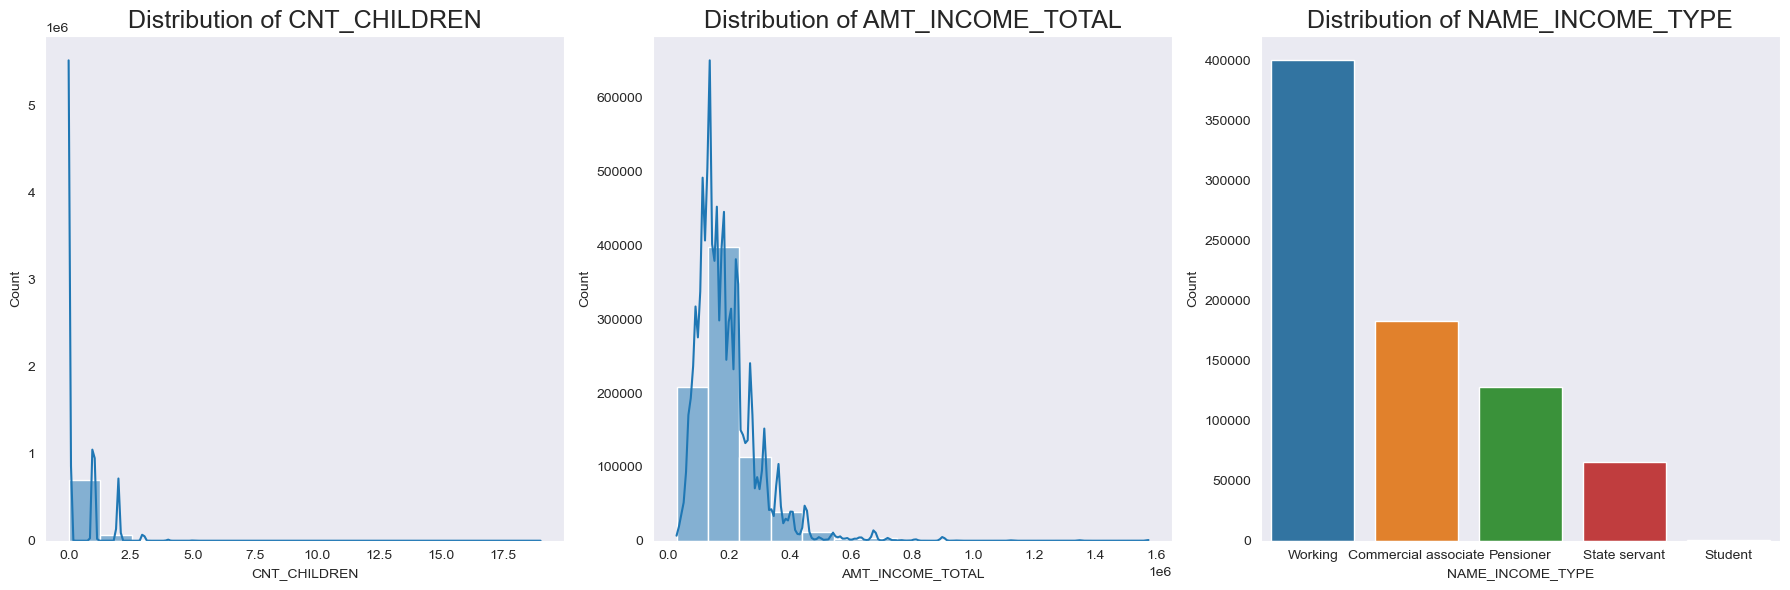

In [46]:
cols=['CNT_CHILDREN', 	'AMT_INCOME_TOTAL','NAME_INCOME_TYPE']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=col, ax=axes[i], bins=15, kde=True)
    else:
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)

    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_ylabel('Count')


plt.tight_layout()
plt.show()

In [48]:
# A significantly high number of applicants have one child and decreasing number of individuals have higher number of children.
# The Income distribution is right skewed, thus most individuals are lower and  middle class.
# With respect to income type "Working" category contributes the most, followed by "Commercial associate" and "Pensioner", while categories like "State servant" have fewer representatives.

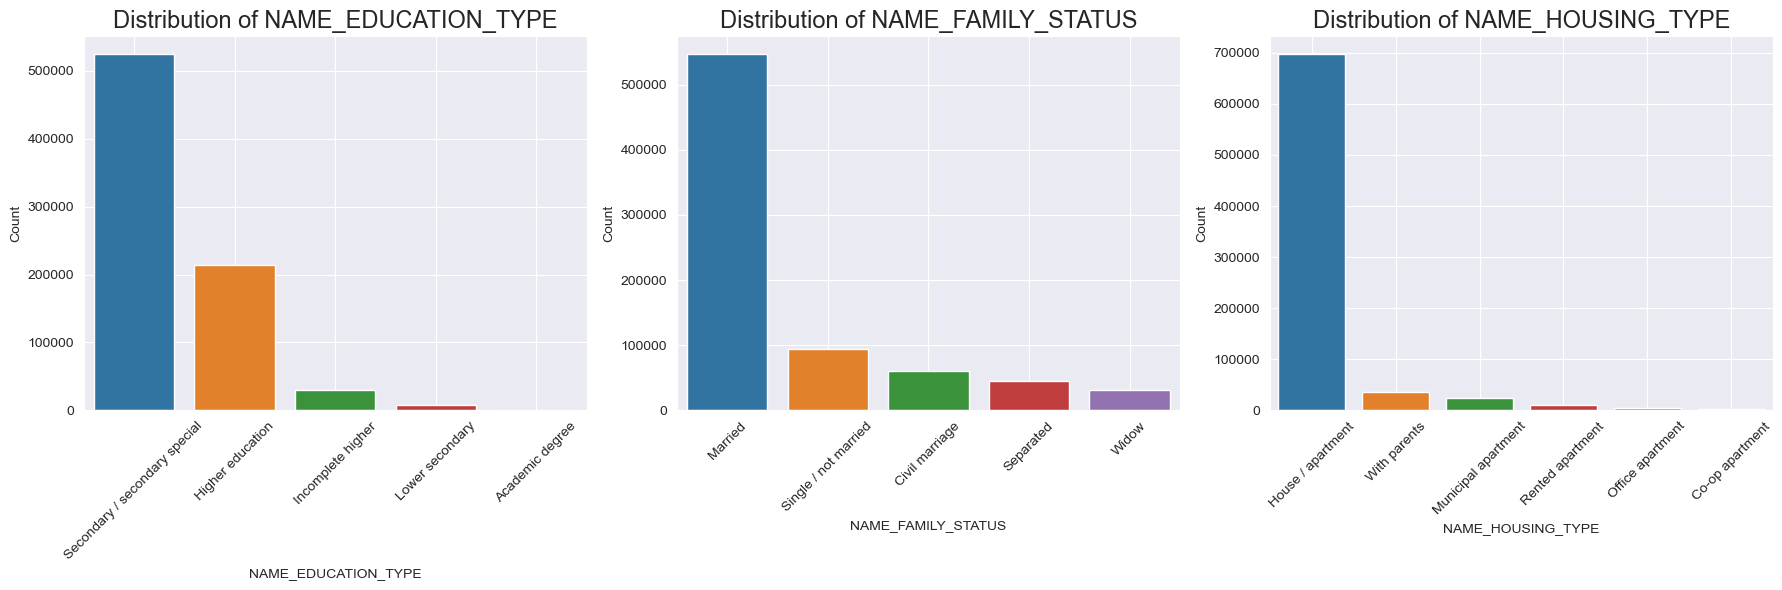

In [49]:
cols = ['NAME_EDUCATION_TYPE', 	'NAME_FAMILY_STATUS', 	'NAME_HOUSING_TYPE']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for index, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[index], order=df[col].value_counts().index)
    axes[index].set_title(f'Distribution of {col}', fontsize = 17)
    axes[index].set_ylabel('Count')
    axes[index].tick_params(axis='x', rotation = 45)
    axes[index].grid(True)

plt.tight_layout()
plt.show()

In [50]:
# The dataset mostly consists of Secondary / Secondary Special educated, followed by Higher education, Incomplete higher education & Lower secondary.
    # This represents high advanced educated customer base,
# Most of them are married, statuses such as "Single / not married", "Civil marriage", "Separated", and "Widow" appearing in descending order of frequency.
# As for housing, majority reside in House/apartment. Less frequent housing types are "With parents", "Municipal apartment", and "Rented apartment".

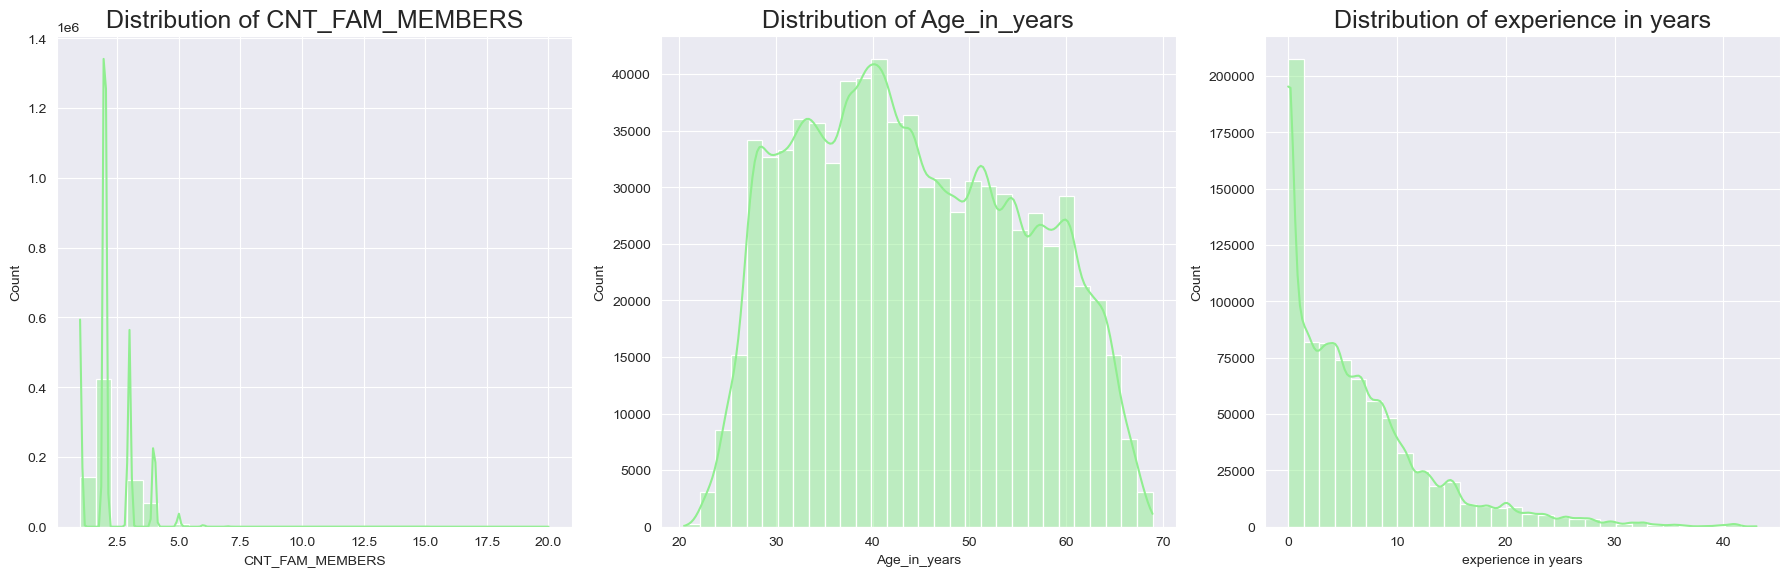

In [57]:
cols = ['CNT_FAM_MEMBERS','Age_in_years','experience in years']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=col, ax=axes[i], bins=30, kde=True , color ='lightgreen')
    else:
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index , color ='green')

    axes[i].set_title(f'Distribution of {col}', fontsize = 18)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()

plt.show()

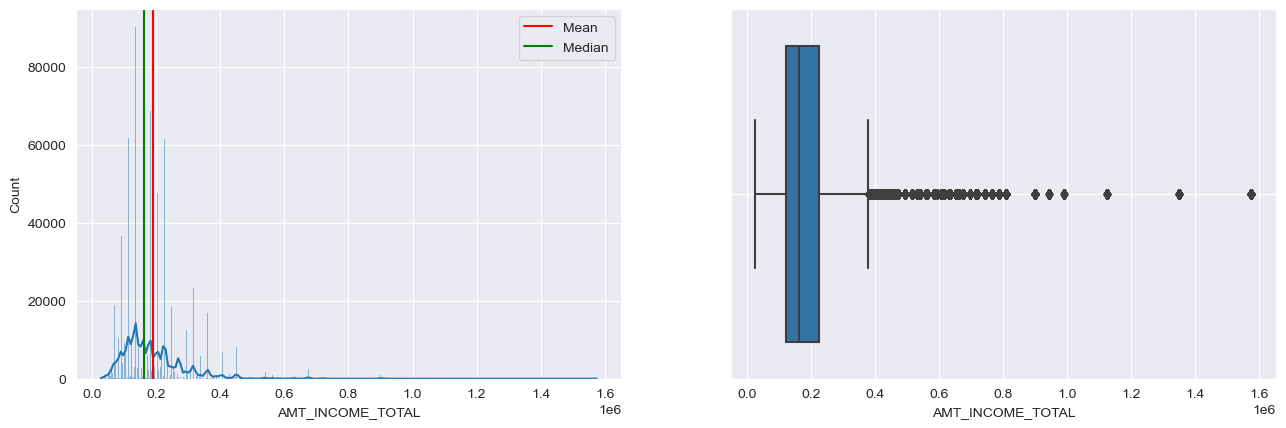

In [59]:
plt.subplot(1,2,1)
sns.histplot(data=df, x='AMT_INCOME_TOTAL',kde=True)
plt.axvline(x=df['AMT_INCOME_TOTAL'].mean(),color="red",label="Mean")
plt.axvline(x=df['AMT_INCOME_TOTAL'].median(),color="green",label="Median")
plt.grid()
plt.legend()

plt.subplot(1,2,2)  # nrows=1, ncols=2
sns.boxplot(data=df, x='AMT_INCOME_TOTAL')

plt.subplots_adjust(right=2.0)
plt.grid()
plt.show()

In [61]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age_in_years,experience in years
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,0,C,32.890411,12.443836
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,-1,C,32.890411,12.443836
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,-2,C,32.890411,12.443836
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,-3,C,32.890411,12.443836
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Unknown,2.0,-4,C,32.890411,12.443836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,Laborers,1.0,-9,0,25.172603,3.268493
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,Laborers,1.0,-10,2,25.172603,3.268493
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,Laborers,1.0,-11,1,25.172603,3.268493
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,Laborers,1.0,-12,0,25.172603,3.268493
